<a href="https://colab.research.google.com/github/jimmy8082/bigdata/blob/main/0518_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("SportsAnalytics")
install.packages("ggplot2")
library(SportsAnalytics)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



`geom_smooth()` using formula 'y ~ x'




Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1516)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
           -85.907               0.493  


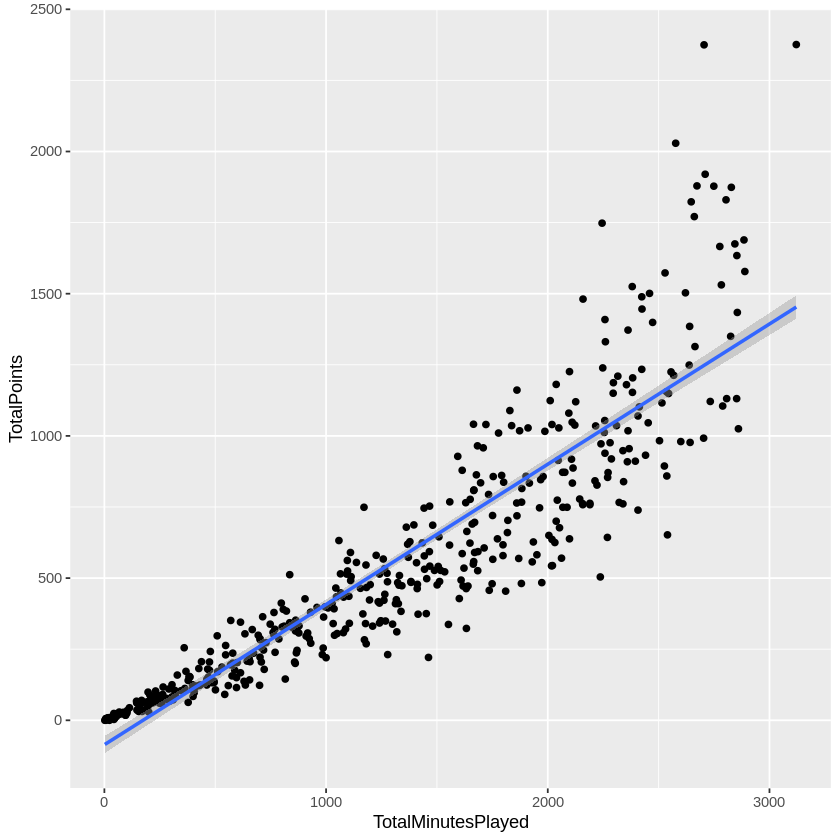

In [18]:
NBA1516 <- fetch_NBAPlayerStatistics("15-16")
ggplot(NBA1516,aes(x=TotalMinutesPlayed,y=TotalPoints))+geom_point()+geom_smooth(method="glm")
lm(TotalPoints~TotalMinutesPlayed,data=NBA1516)

In [19]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,data=NBA1516)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA1516)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
          -1.80e+01            -2.35e-04             1.26e+00  

Degrees of Freedom: 475 Total (i.e. Null);  473 Residual
Null Deviance:	    9.9e+07 
Residual Deviance: 2160000 	AIC: 5370

In [20]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,data=NBA1516)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1516)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
           22.85222             -0.00654              1.27572  
         PositionPF           PositionPG           PositionSF  
          -39.41633            -65.03465            -38.52230  
         PositionSG  
          -52.17514  

Degrees of Freedom: 474 Total (i.e. Null);  468 Residual
  (1 observation deleted due to missingness)
Null Deviance:	    9.9e+07 
Residual Deviance: 2e+06 	AIC: 5320

In [21]:
mydata <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")
mydata

admit,gre,gpa,rank
<int>,<int>,<dbl>,<int>
0,380,3.6,3
1,660,3.7,3
1,800,4.0,1
1,640,3.2,4
0,520,2.9,4
1,760,3.0,2
1,560,3.0,1
0,400,3.1,2
1,540,3.4,3


In [22]:
mydata$rank <- factor(mydata$rank)
mylogit <- glm(admit~gre+gpa+rank,data=mydata,family="binomial")
sum <- summary(mylogit)
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.9900,1.1400,-3.5,0.00047
gre,0.0023,0.0011,2.1,0.03847
gpa,0.8040,0.3318,2.4,0.01539
rank2,-0.6754,0.3165,-2.1,0.03283
rank3,-1.3402,0.3453,-3.9,0.00010
rank4,-1.5515,0.4178,-3.7,0.00020


In [23]:
install.packages("rpart")
library(rpart)
DT <- rpart(Position~Blocks+ThreesMade+Assists+Steals,data=NBA1920)
DT

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



n= 529 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 529 410 SF (0.16 0.2 0.21 0.22 0.21)  
    2) Blocks>=34 94  49 C (0.48 0.3 0.032 0.15 0.043)  
      4) ThreesMade< 22 35   6 C (0.83 0.17 0 0 0) *
      5) ThreesMade>=22 59  37 PF (0.27 0.37 0.051 0.24 0.068)  
       10) Steals< 52 33  18 PF (0.42 0.45 0.03 0.061 0.03)  
         20) Blocks>=42 24  11 C (0.54 0.33 0.042 0.083 0) *
         21) Blocks< 42 9   2 PF (0.11 0.78 0 0 0.11) *
       11) Steals>=52 26  14 SF (0.077 0.27 0.077 0.46 0.12) *
    3) Blocks< 34 435 330 PG (0.09 0.18 0.25 0.23 0.24)  
      6) Assists>=2.2e+02 53  14 PG (0.019 0.019 0.74 0.075 0.15) *
      7) Assists< 2.2e+02 382 280 SF (0.099 0.21 0.18 0.26 0.25)  
       14) ThreesMade< 4.5 119  84 PF (0.19 0.29 0.16 0.17 0.18) *
       15) ThreesMade>=4.5 263 180 SF (0.057 0.17 0.19 0.3 0.29)  
         30) Blocks>=10 118  79 SF (0.093 0.24 0.068 0.33 0.27)  
           60) Steals< 46 70  47 PF (0.14 0.33 0.043 0.33 0.16) 

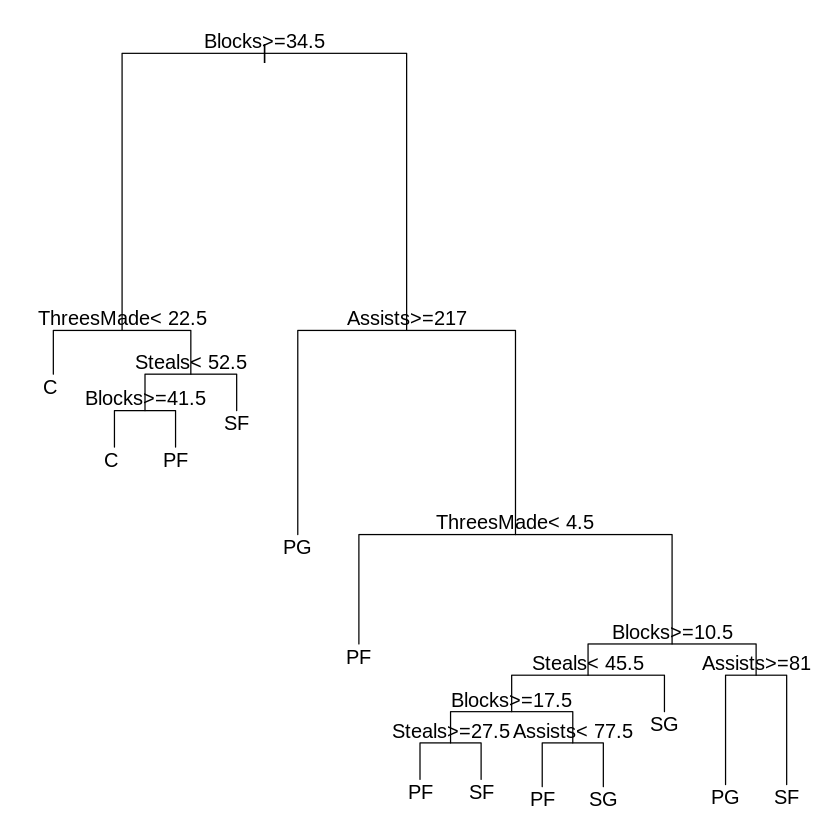

In [24]:
par(mfrow=c(1,1),mar=rep(1,4))
plot(DT)
text(DT,use.n=F,all=F,cex=1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



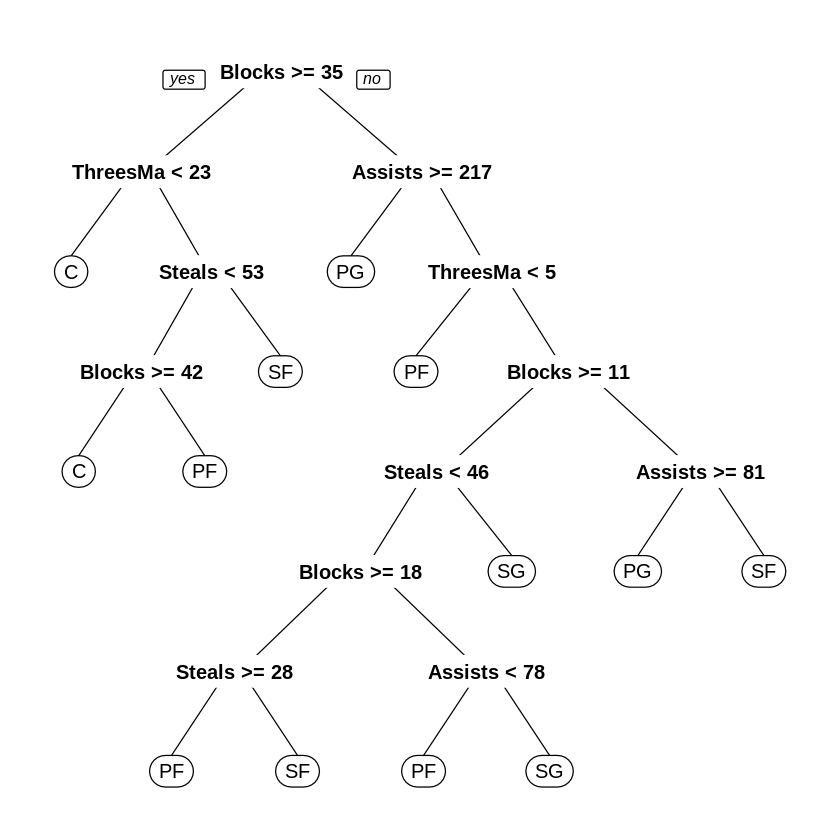

In [25]:
install.packages("rpart.plot")
library(rpart.plot)
prp(DT)

In [26]:
install.packages("arules")
library(arules)
install.packages("datasets")
library(datasets)
data(Groceries)
Groceries@data@Dim

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”


[1]  169 9835

In [27]:
rules <- apriori(Groceries,parameter=list(supp=0.001,conf=0.8),control=list(verbose=F))
options(digits=2)
inspect(rules[1:5])

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


In [28]:
rules <- sort(rules,by="confidence",decreasing=TRUE)
inspect(rules[1:5])

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [29]:
rulesR <- apriori(data=Groceries,parameter=list(supp=0.001,conf=0.08),appearance=list(default="lhs",rhs="rice"),control=list(verbose=F))
rulesR <- sort(rulesR,decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs                        rhs    support confidence coverage lift count
[1] {root vegetables,                                                       
     other vegetables,                                                      
     whole milk,                                                            
     yogurt}                => {rice}  0.0013      0.169   0.0078   22    13
[2] {root vegetables,                                                       
     whole milk,                                                            
     butter}                => {rice}  0.0010      0.123   0.0082   16    10
[3] {root vegetables,                                                       
     other vegetables,                                                      
     yogurt}                => {rice}  0.0014      0.110   0.0129   14    14
[4] {root vegetables,                                                       
     whole milk,                                                            

In [30]:
rulesR <- apriori(data=Groceries,parameter=list(supp=0.001,conf=0.08),appearance=list(default="lhs",rhs="soda"),control=list(verbose=F))
rulesR <- sort(rulesR,decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs                                             rhs    support confidence
[1] {coffee,misc. beverages}                     => {soda} 0.0010  0.77      
[2] {yogurt,rolls/buns,bottled water,newspapers} => {soda} 0.0010  0.77      
[3] {sausage,bottled water,bottled beer}         => {soda} 0.0011  0.73      
[4] {sausage,white bread,shopping bags}          => {soda} 0.0010  0.67      
[5] {rolls/buns,bottled water,chocolate}         => {soda} 0.0013  0.65      
    coverage lift count
[1] 0.0013   4.4  10   
[2] 0.0013   4.4  10   
[3] 0.0015   4.2  11   
[4] 0.0015   3.8  10   
[5] 0.0020   3.7  13   


In [31]:
rulesR <- apriori(data=Groceries,parameter=list(supp=0.001,conf=0.15,minlen=2),appearance=list(default="rhs",lhs="rice"),control=list(verbose=F))
rulesR <- sort(rulesR,decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs       rhs                     support confidence coverage lift count
[1] {rice} => {whole milk}            0.0047  0.61       0.0076   2.4  46   
[2] {rice} => {other vegetables}      0.0040  0.52       0.0076   2.7  39   
[3] {rice} => {root vegetables}       0.0032  0.41       0.0076   3.8  31   
[4] {rice} => {yogurt}                0.0023  0.31       0.0076   2.2  23   
[5] {rice} => {fruit/vegetable juice} 0.0019  0.25       0.0076   3.5  19   


In [32]:
rulesR <- apriori(data=Groceries,parameter=list(supp=0.001,conf=0.15,minlen=2),appearance=list(default="rhs",lhs="soda"),control=list(verbose=F))
rulesR <- sort(rulesR,decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs       rhs                support confidence coverage lift count
[1] {soda} => {whole milk}       0.040   0.23       0.17     0.90 394  
[2] {soda} => {rolls/buns}       0.038   0.22       0.17     1.20 377  
[3] {soda} => {other vegetables} 0.033   0.19       0.17     0.97 322  
[4] {soda} => {bottled water}    0.029   0.17       0.17     1.50 285  
[5] {soda} => {yogurt}           0.027   0.16       0.17     1.12 269  
